In [2]:
import matplotlib.pyplot as plt
import numpy as np
import torch

from splice.splice_ard import SPLICE
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

### Linear Test with 1 global shared and 1 private per view

In [23]:
# generate random latents (# samples x 1)
z_shared = torch.rand(1000, 1)

z_a = torch.rand(1000, 1)
z_b = torch.rand(1000, 1)
z_c = torch.rand(1000, 1)

# generate random observation matrices, we want observations to be 10-D
c_a = torch.rand(2, 10)
c_b = torch.rand(2, 10)
c_c = torch.rand(2, 10)

# generate observations
A = torch.matmul(torch.cat((z_shared, z_a), dim=1), c_a).to(device)
B = torch.matmul(torch.cat((z_shared, z_b), dim=1), c_b).to(device)
C = torch.matmul(torch.cat((z_shared, z_c), dim=1), c_c).to(device)


In [27]:
class lin(torch.nn.Module):
    def forward(self, output):
        return output

In [28]:
model = SPLICE(3, [10,10,10], 4, [10], [10], lin)


In [ ]:

model.fit(
    [A, B, C],
    [A, B, C],
    None,
    epochs=5000,
    c_ard = 0.001,
    c_l2=0.005,
    end_factor=1,
    weight_decay=1e-3,
    checkpoint_freq=100
)


0/5000 |                                                 |   0% [00:00<?, ?it/s]

Epoch 0: Reconstruction loss: 0.0002 | ARD L1: 6.0000


107/5000 |▊                                      |   2% [00:03<02:29, 32.69it/s]

Epoch 100: Reconstruction loss: 0.0001 | ARD L1: 6.0000


206/5000 |█▌                                     |   4% [00:07<02:42, 29.48it/s]

Epoch 200: Reconstruction loss: 0.0001 | ARD L1: 6.0000


285/5000 |██▏                                    |   6% [00:10<02:49, 27.80it/s]


KeyboardInterrupt: 

In [30]:
recons, z, z_gat, gates = model(torch.cat([A, B, C], dim=1).to(device))

In [31]:
gates

[tensor([0., 1., 0., 1.], device='cuda:0', grad_fn=<_ARDgateBackward>),
 tensor([0., 0., 1., 1.], device='cuda:0', grad_fn=<_ARDgateBackward>),
 tensor([1., 0., 0., 1.], device='cuda:0', grad_fn=<_ARDgateBackward>)]

In [32]:
A_recon = recons[0].detach().cpu().numpy()
B_recon = recons[1].detach().cpu().numpy() 
C_recon = recons[2].detach().cpu().numpy()

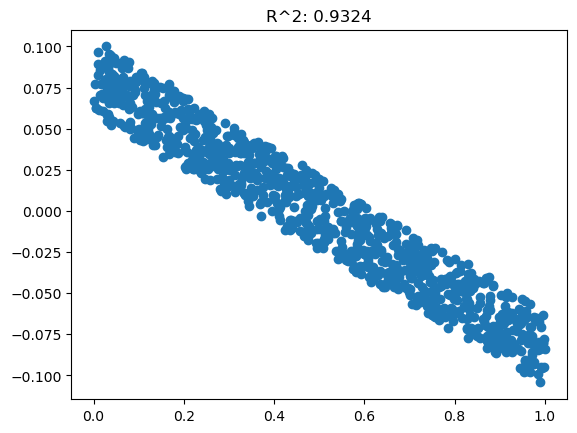

In [33]:
#calculate r^2 between z_a and z[:,-1]
r_squared = np.corrcoef(z_a.detach().cpu().numpy().flatten(), z[:,1].detach().cpu().numpy().flatten())[0, 1] ** 2
plt.title(f"R^2: {r_squared:.4f}")
plt.scatter(z_a, z[:,1].detach().cpu().numpy())

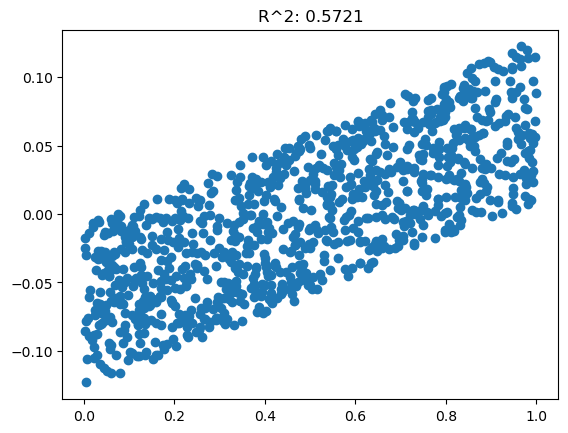

In [34]:
#calculate r^2
r_squared_b = np.corrcoef(z_b.detach().cpu().numpy().flatten(), z[:,2].detach().cpu().numpy().flatten())[0, 1] ** 2
plt.title(f"R^2: {r_squared_b:.4f}")
plt.scatter(z_b, z[:,2].detach().cpu().numpy())

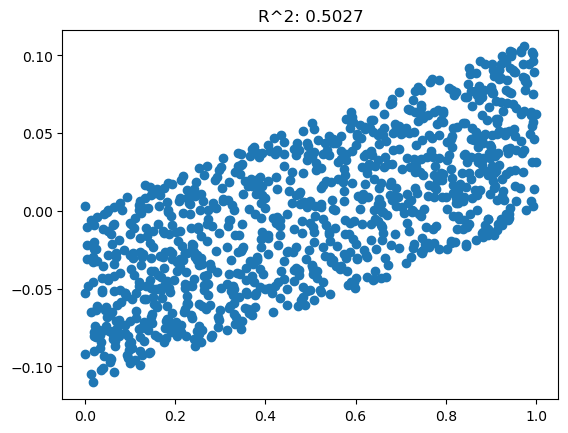

In [35]:
#calculate r^2 between z_a and z[:,-1]
r_squared = np.corrcoef(z_c.detach().cpu().numpy().flatten(), z[:,0].detach().cpu().numpy().flatten())[0, 1] ** 2
plt.title(f"R^2: {r_squared:.4f}")
plt.scatter(z_c, z[:,0].detach().cpu().numpy())

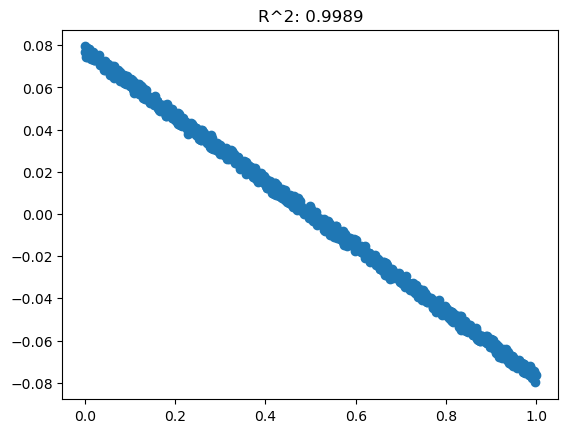

In [37]:
#calculate r^2 between z_a and z[:,-1]
r_squared = np.corrcoef(z_shared.detach().cpu().numpy().flatten(), z[:,3].detach().cpu().numpy().flatten())[0, 1] ** 2
plt.title(f"R^2: {r_squared:.4f}")
plt.scatter(z_shared, z[:,3].detach().cpu().numpy())

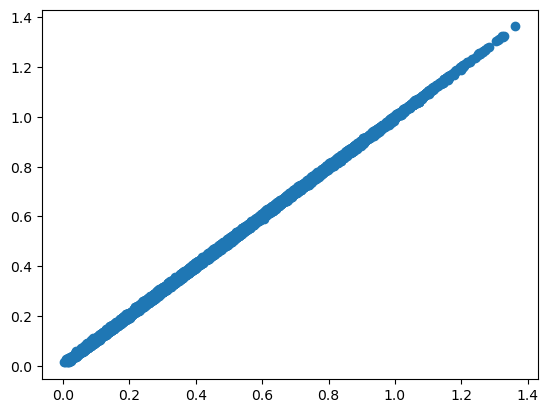

In [38]:
plt.scatter(A.detach().cpu().numpy().flatten(), A_recon.flatten())

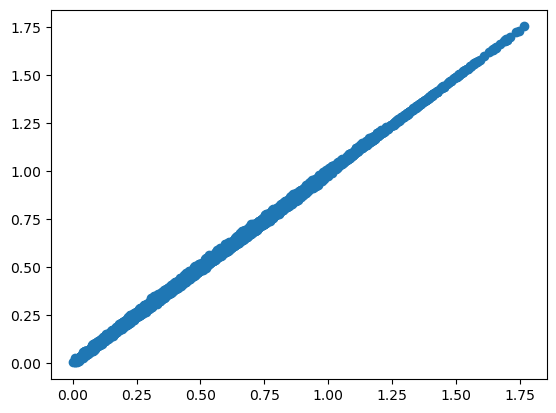

In [39]:
plt.scatter(B.detach().cpu().numpy().flatten(), B_recon.flatten())

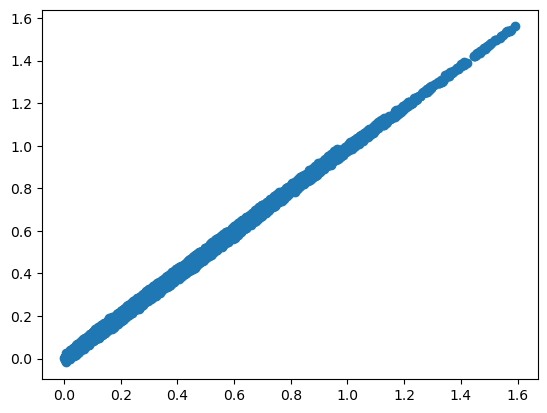

In [40]:
plt.scatter(C.detach().cpu().numpy().flatten(), C_recon.flatten())